<a href="https://colab.research.google.com/github/ramansandhu17/A-B-Testing/blob/main/t-testanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Visualizing Tap-Through Rate via EDA

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df=pd.read_csv('snapchat_ab_data.csv')

df.head()

,user_id,group,impressions,taps,ttr
0,1,control,11,2,0.181818
1,2,control,8,2,0.250000
2,3,control,17,2,0.117647
3,4,control,19,5,0.263158
4,5,control,15,1,0.066667


In [6]:
#print(df['group'].value_counts())

group_summary=df.groupby('group')[['impressions','taps','ttr']].mean()

print(group_summary)



         impressions    taps       ttr
group                                 
control      12.3932  1.4608  0.117493
test         12.6054  1.8984  0.150253


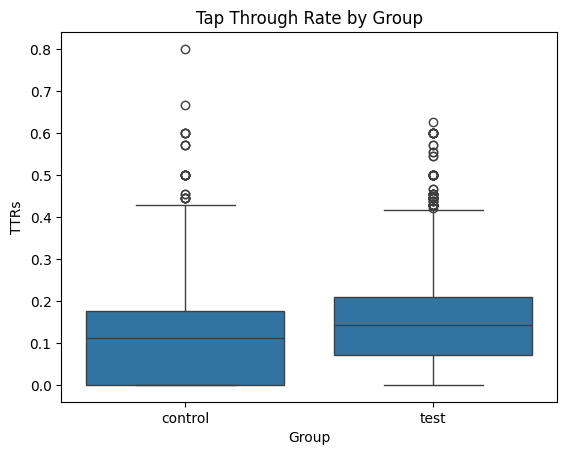

In [7]:
#Visualize

sns.boxplot(x='group',y='ttr',data=df)
plt.title("Tap Through Rate by Group")
plt.ylabel('TTRs')
plt.xlabel('Group')
plt.show()

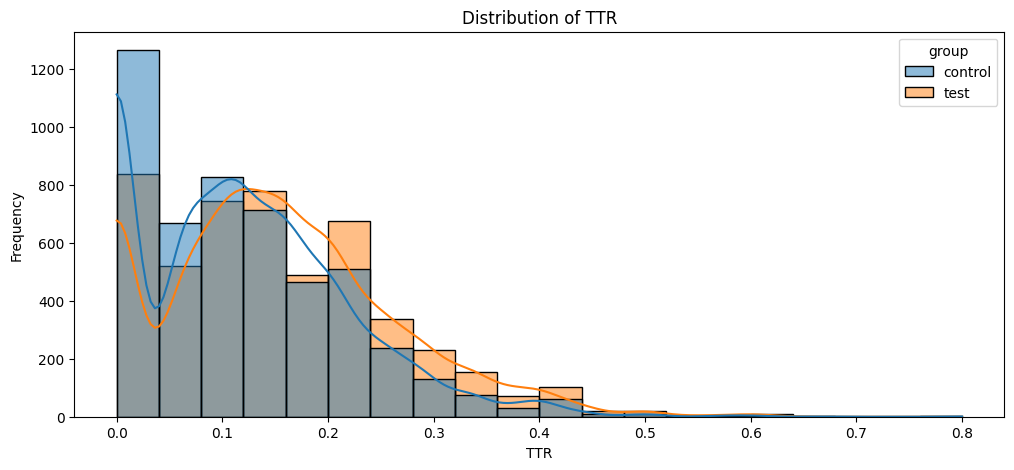

In [8]:
#Distribution of TTR

plt.figure(figsize=(12,5))

sns.histplot(data=df,x='ttr',bins=20,kde=True,hue='group')
plt.title("Distribution of TTR")
plt.xlabel('TTR')
plt.ylabel('Frequency')
plt.show()

In [9]:
#Statistical Testing

#We will use a Two Sample - T Test since we have two independent groups

from scipy.stats import ttest_ind

control_ttr=df[df['group']=='control']['ttr']
test_ttr=df[df['group']=='test']['ttr']

#Performing t-test
t_stat,p_value=ttest_ind(control_ttr,test_ttr) #The order will give if the first group has higher mean than other if t+ve

print("T-statistic:",t_stat)
print("P-value:",p_value)


T-statistic: -15.623881156633896
P-value: 2.1953111240105483e-54


Since p is <=0.05 we reject the initial null hypothesis and accept that there is a statistically significant difference in TTR between the layouts and the grid layout showed better performance.